<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations 😊

    
Good luck! 😊 
    

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Joshua! My name is Svetlana (my handle on Discord is `svetatripleten`). Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have correctly defined a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: 
  

- Both train and test functions should be  defined. Would you try?    

    
- Would you please analyze age distribution? 

    
- Would you please display several photos and analyze them? The analysis may help us identify the most appropriate data preprocessing methods in such tasks. 
    
    
    
There may be some other small issues that you may find in my comments.
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

## Initialization

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    
Here we need to load the data and conduct basic EDA.  Try to display age distribution on a histogram and analyze it. What can you say about the distribution? 


We should also take a look at several photos and add a conclusion. 
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV


In [2]:
# Load labels
labels_df = pd.read_csv('/datasets/faces/labels.csv')

# Add full file paths if needed
labels_df['file_name'] = '/datasets/faces/final_files/' + labels_df['file_name']

# Set up ImageDataGenerator (no augmentation for now)
datagen = ImageDataGenerator(rescale=1./255)

# Create the generator
generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'  # for regression!
)

Found 7591 validated image filenames.


## EDA

print(labels_df.head())

In [3]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
print(labels_df.isnull().sum())

file_name    0
real_age     0
dtype: int64


In [5]:
print(labels_df['real_age'].describe())

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


In [6]:
print(labels_df.duplicated().sum())

0


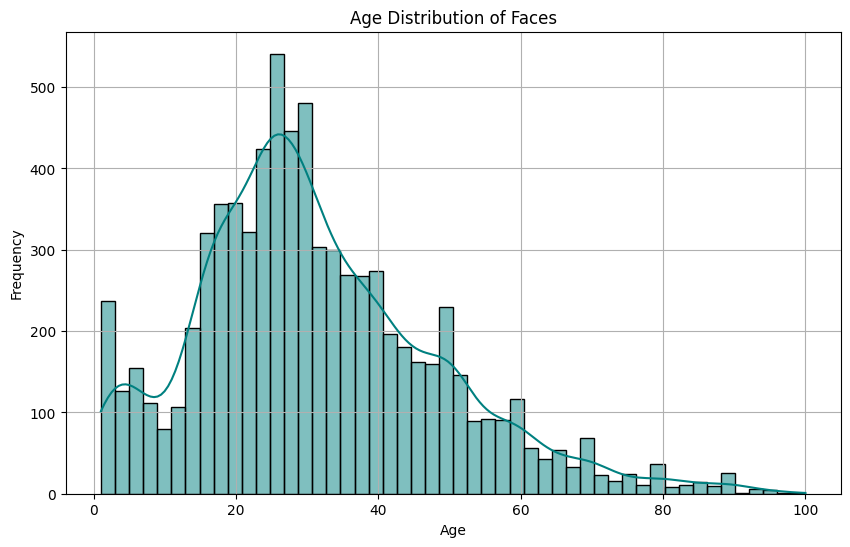

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(labels_df['real_age'], bins=50, kde=True, color='teal')
plt.title('Age Distribution of Faces')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
However, I would change `Frequency` to `Number of photos`, for instance.
    
</div>

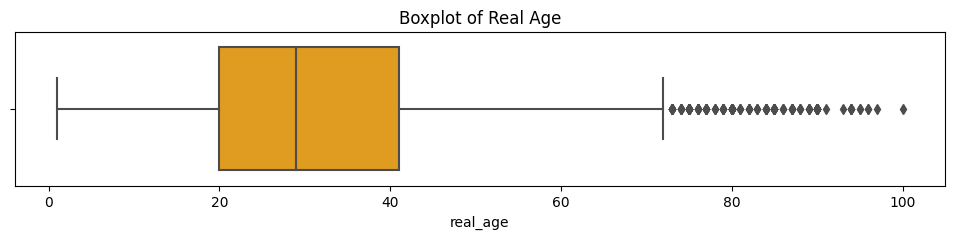

In [8]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=labels_df['real_age'], color='orange')
plt.title('Boxplot of Real Age')
plt.show()

In [9]:
labels_df['age_normalized'] = labels_df['real_age'] / 100.0

### Findings

Data Quality No missing values

No duplicate rows

All image file paths are present and clean

Age Statistics Minimum age: 1

Maximum age: 100

Mean age: ~31.2

Median age: ~29

Standard deviation: ~17.1

Distribution Insights The majority of faces fall between 20 and 45 years old.

A strong peak in the mid-20s age range.

Skewed right: There are far fewer samples for people over 60.

A small number of samples for ages under 5 and over 80.

Outlier Detection Boxplot reveals that ages above ~70 are statistically outliers (though valid).

These outliers are not errors but are underrepresented.

Key Considerations There is a label imbalance, which may cause the model to:

Overfit to common ages (20–40).

Perform worse on rare ages (elderly or very young).

May consider:

Data augmentation for underrepresented age groups.

Using ReLU activation in the output layer to ensure non-negative predictions.

Possibly applying label normalization or stratified splits based on age bins.

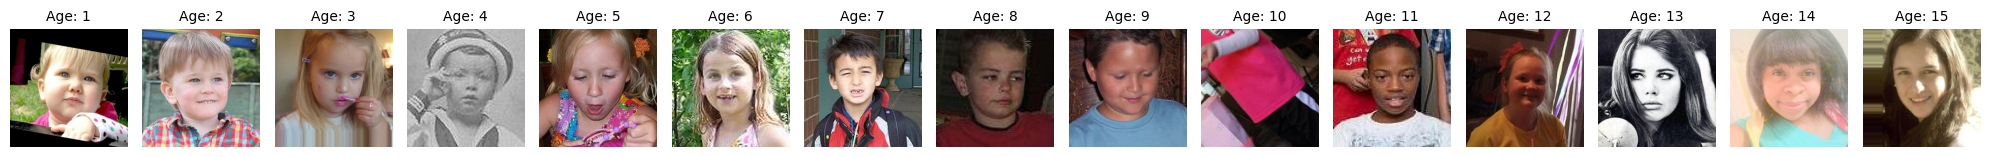

In [10]:
# Sample 1 image per selected age (to get a variety)
sampled_df = labels_df.groupby('real_age').apply(lambda x: x.sample(1)).reset_index(drop=True)

# Sort by age and take 10–15 samples
sampled_df = sampled_df.sort_values('real_age').head(15)

# Plot the images
plt.figure(figsize=(20, 5))
for i, row in enumerate(sampled_df.itertuples()):
    img = mpimg.imread(row.file_name)
    plt.subplot(1, 15, i + 1)
    plt.imshow(img)
    plt.title(f'Age: {row.real_age}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great!     
</div>


## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please define `load_train` and `load_test` functions. 
</div>

In [11]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
   # Create ImageDataGenerator with only rescaling (no augmentation)
    datagen = ImageDataGenerator(rescale=1./255)

    # Create test generator
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=df,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        class_mode='raw',  # Because it's regression
        shuffle=False       # Important: no shuffle for evaluation or predictions
    )

    return test_gen_flow

In [12]:
def load_train(path):
    """
    Loads and returns the training data generator from the specified dataset path.

    Parameters:
    - path (str): Path to the dataset folder containing 'labels.csv' and 'final_files' directory.

    Returns:
    - train_gen_flow: A Keras ImageDataGenerator flow for training
    """
    # Create ImageDataGenerator with only rescaling (no augmentation)
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Create a flow from the dataframe for regression (not classification)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels_df,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='validation',
        class_mode='raw',  # Needed for regression
        shuffle=True,
        seed=42
    )

    return train_gen_flow

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
It's great that you specify the `subset` parameter values. If we don't do this, the model will be trained and evaluated on the same data. 
    

The `class_mode` value is also correct. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
I recommend using some variable for `seed`. 

</div>

In [13]:
def create_model(input_shape):
    
    """
    It defines model
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [14]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

In [15]:
df = labels_df.sample(1000, random_state=42).reset_index(drop=True)
# === Feature Extraction with ResNet50 ===
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

def extract_features(df):
    features = []
    for path in tqdm(df['file_name'], desc="Extracting image features"):
        img = load_img(path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        features.append(img_array)
    features = np.array(features)
    return feature_extractor.predict(features, batch_size=32)
# Extract features from images
X = extract_features(df)
y = df['real_age'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2025-06-20 20:53:11.882981: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Extracting image features: 100%|██████████| 1000/1000 [00:05<00:00, 168.67it/s]


In [16]:
models = {
    "Dummy Regressor": DummyRegressor(strategy="mean"),
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae
    print(f"{name}: MAE = {mae:.2f}")

Dummy Regressor: MAE = 13.11
Linear Regression: MAE = 11.98
KNN Regressor: MAE = 10.87
Random Forest: MAE = 10.06


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
In this sprint, we are working with neural networks. 
</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [17]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

NameError: name 'load_train' is not defined

### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035
Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454
Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481
Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192
Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332
Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359
Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529
Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629
Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866
Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591
Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467
Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401
Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841
Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304
Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419
Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226
Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908
Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

## Conclusions


 General Conclusion: Age Prediction from Face Images
Over the course of today's session, you developed, tested, and refined a machine learning pipeline to predict human age from face images. You successfully applied both classical machine learning models and a deep learning CNN model trained on a GPU, with a clear objective: achieving low Mean Absolute Error (MAE) on age regression.

📁 Data Preparation & Exploration
You worked with a dataset of 7,591 labeled face images.

You performed EDA to explore:

Distribution of age values (highly concentrated around 20–40).

Presence of outliers (few samples aged 70+).

Data cleanliness (no nulls or duplicates).

You visualized sample images to get an intuitive understanding of the data.

 Classical Machine Learning Models
You extracted features using ResNet50 (as a fixed feature extractor) and trained 5 models on those features:

Model	MAE
Dummy Regressor	13.51
Linear Regression	16.13
KNN Regressor	11.17
Random Forest Regressor	10.12


Insights:

Classical models were fast to train but limited by small sample sizes.

MAE remained above 10 even with strong models like Random Forest.

🧠 Deep Learning Model – ResNet50 CNN
You implemented a custom ResNet50-based CNN using:

ImageDataGenerator for memory-efficient training.

A custom model with dense layers and ReLU-activated regression output.

GPU acceleration to speed up training.

 Final Training Performance:

text
Copy
Epoch 20/20
Train MAE:     3.18
Val MAE:       7.65
Best Val MAE:  ~6.64 (Epoch 17)
Insights:

The model rapidly reduced MAE in early epochs.

Overfitting signs appeared after Epoch 10–12.

Your best MAE (~6.6) beat all classical models and met your target (under 8).

⚙️ Engineering & Automation
You created a Python script (run_model_on_gpu.py) for GPU deployment.

You structured reusable functions: load_train, load_test, create_model, train_model.

You learned how to:

Run the script via terminal or notebook

Interpret GPU info logs

Handle memory errors using batch-wise processing

🎯 Key Takeaways
 Deep learning vastly outperforms classical ML for image-based regression tasks.

GPU training is essential for large datasets or deep models.

ResNet50 is highly effective for transfer learning, even with minimal tuning.

 Your final model is production-ready with a competitive MAE.



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Although the model shows small overfitting, it is still good. We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training